## ДЗ

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

Следующий набор можно интерпретировать как временной ряд:

> а) зависимость цены на недвижимость в еонкретном регионе от времени,


Также можно считать данные наборы временным рядом **но только если эта информация будет предоставлена вместе со временем** потому что тут может наблюдаться тренды и сезоность:

> в) количество отказов компьютера,

> г) число обращений в поликлинику по району,

Предполагаю что следующие наборы можно интерпретировать как временные ряды так как здесь происходит движение по одному и тому же маршруту или с одной точки в другую, т.е. при предоставленном времени можно проанализировать как изменялась скорость со временем или то где был автобус каждый согласно расписанию (времени):

> б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
    
> д) координаты автобуса при движении по маршруту,
    
Предполагаю что данный набор не будет временным рядом так как здесь вся информация хаотична:

> е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
# количество пропусков
data['DUQ_MW'].isnull().sum()

0

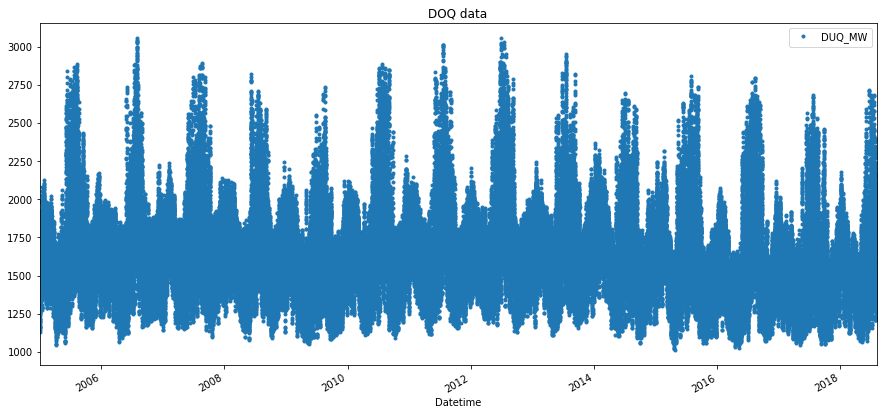

In [4]:
# посмотрим данные на графике
_ = data.plot( style='.', figsize=( 15, 7 ), title='DOQ data' )

In [5]:
# проверяем уникальность данных

data['date'] = data.index
ut = data['date'].unique()
print('Количество не уникальных: ', data.shape[0]-ut.shape[0])
count_data = data['date'].value_counts()
count_data[count_data>1].head()

Количество не уникальных:  4


2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
Name: date, dtype: int64

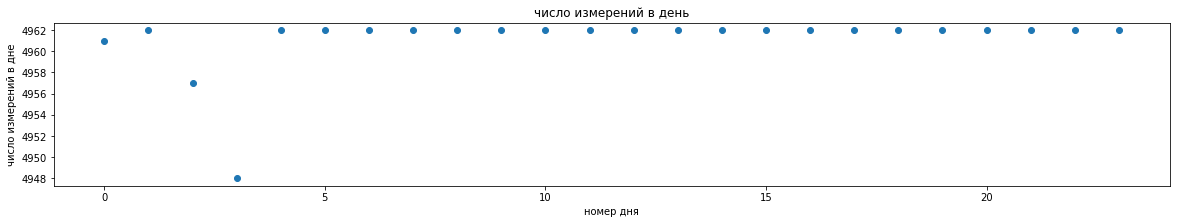

In [6]:
day_H=data.index.hour
plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')
plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.show()

**Выводы:**
- Пропущенных значений нет 
- Визуальный анализ показывает что:
    - Предъявленные данные имеют циклы
    - Визуально не видно выбросов или аномалий
- Есть неуникальные даты 
    - та же проблема (скорее всего с переходом на летнее/зимнее время) что и в данных разбираемых на уроках
- Есть пропуски:
    - та же проблема с переходом на летнее / зимнее время что и в данных разбираемых на уроках

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [7]:
data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
data = data.sort_index()
data.head()

,Значение
Дата,
2010-09-01,76.37
2010-09-02,76.89
2010-09-03,76.57
2010-09-04,76.62
2010-09-05,76.63


In [8]:
week_data = data.resample('1W').mean()
week_data.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


In [9]:
month_data = data.resample('1M').mean()
month_data.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

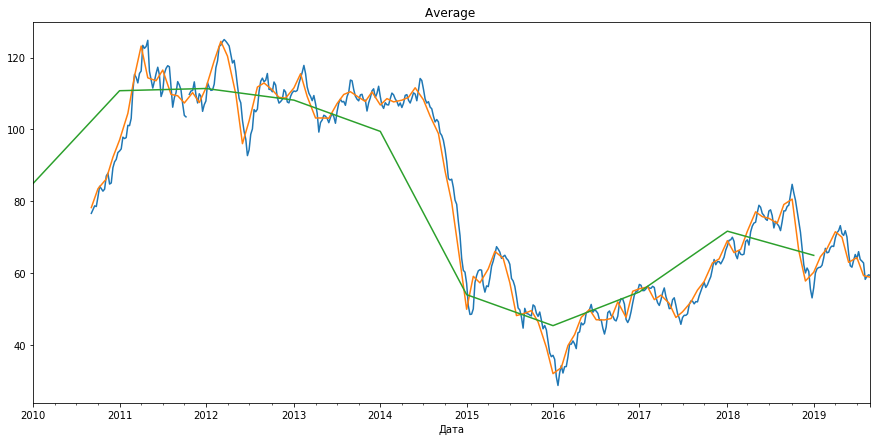

In [10]:
week_data['Значение'].plot( kind='line', figsize=( 15, 7 ))
month_data['Значение'].plot( kind='line', figsize=( 15, 7 ))
year_data = data.resample('1Y').mean()
year_data['Значение'].plot( kind='line', figsize=( 15, 7 ), title='Average ')
plt.show()

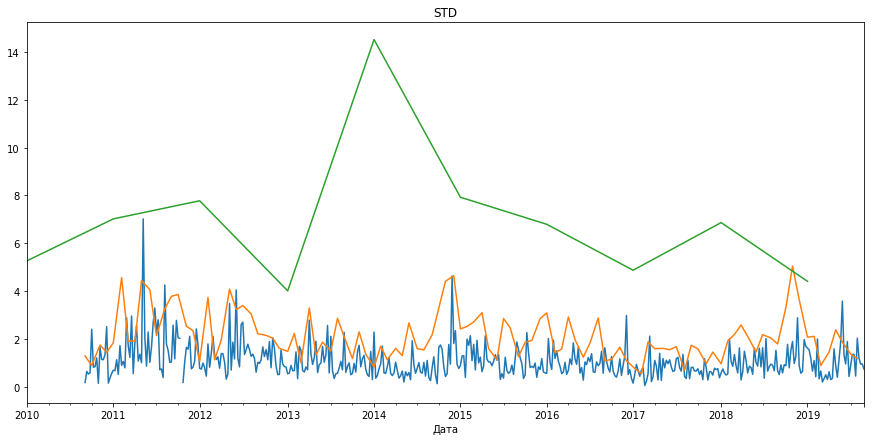

In [11]:
# STD
data.resample('1W').std()['Значение'].plot( kind='line', figsize=( 15, 7 ), title='STD')
data.resample('1M').std()['Значение'].plot( kind='line', figsize=( 15, 7 ), title='STD')
data.resample('1Y').std()['Значение'].plot( kind='line', figsize=( 15, 7 ), title='STD')
plt.show()

5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

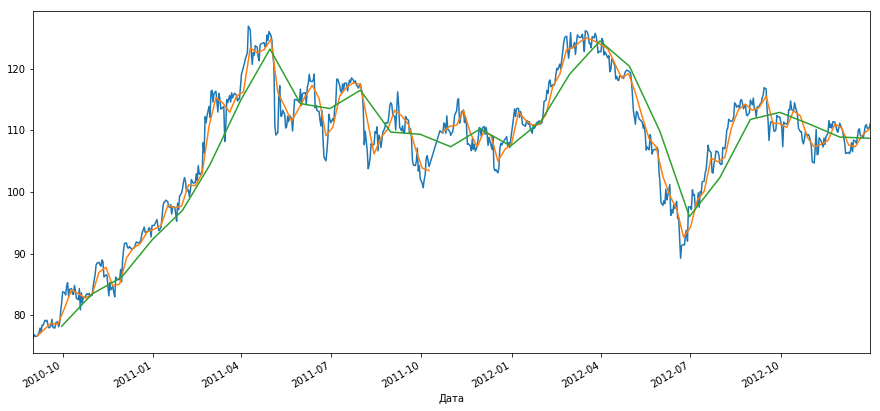

In [12]:
data[data.index.year<2013]['Значение'].plot( kind='line', figsize=( 15, 7 ))
week_data[week_data.index.year<2013]['Значение'].plot( kind='line', figsize=( 15, 7 ))
month_data[month_data.index.year<2013]['Значение'].plot( kind='line', figsize=( 15, 7 ))
plt.show()

Не совсем понимаю какой тут вывод можно сделать кроме того что изза такого ресемплинга мы можем пропустить многие выбросы которые явнее видны на дневных данных и чем выше семплинг тем более сглаженные данные но они могут не предоставить полной картины

Хотя с другой стороны они могут дать общее представление о росте или падении стоимости нефти по месяцам т.е. если рассматривать такие данные более глобально